# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Projects/S2484'

Mounted at /content/drive
/content/drive/MyDrive/Projects/S2484


# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import pickle
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

# Data

## Dataset 1: Twitter airline sentiment

### Read

In [3]:
df1= pd.read_csv('data/Twitter-US-Airline-Sentiment/Tweets.csv')

### Overview

In [4]:
df1.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

### Visualize

**`Figure 1`** in the article

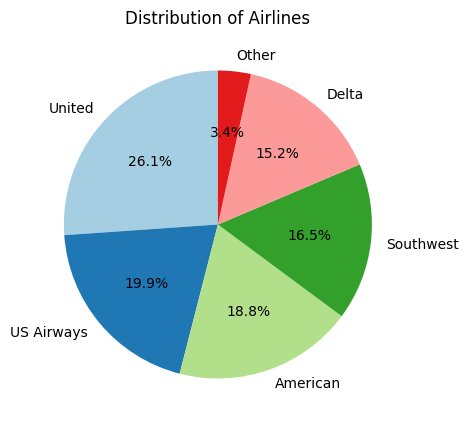

In [5]:
# Get the top 5 most frequent values in the 'airline' column
top_airlines = df1['airline'].value_counts().nlargest(5)

# Create a new column with only the top 5 values and replace others with 'Other'
df1['airline_top5'] = df1['airline'].where(df1['airline'].isin(top_airlines.index), 'Other')

# Plot a pie chart
plt.figure(figsize=(5,5))
df1['airline_top5'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Airlines')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

**`Figure 2`** in the article

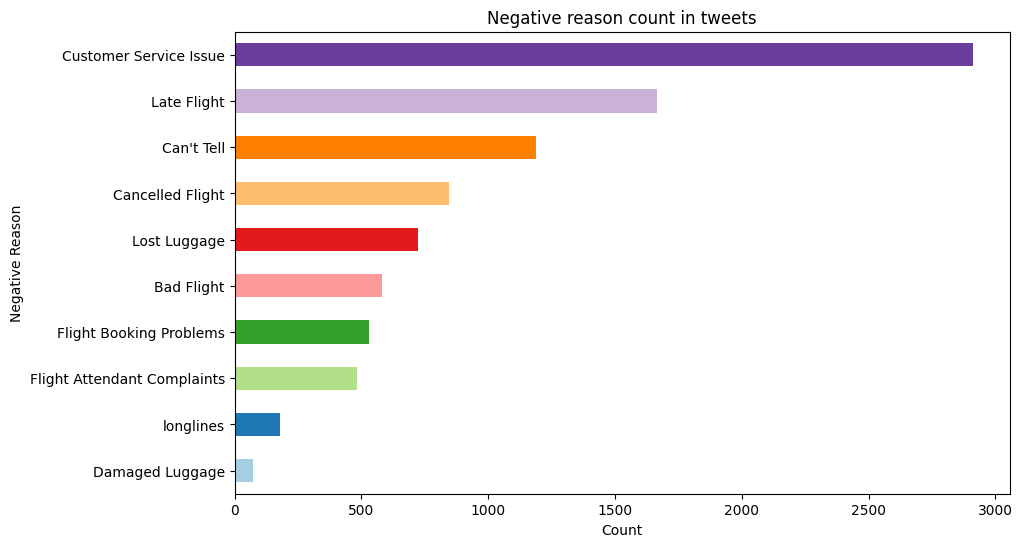

In [6]:
# Plot a bar chart for the 'negativereason' column
plt.figure(figsize=(10, 6))
df1['negativereason'].value_counts().sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Negative reason count in tweets')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

## Dataset 2: Women’s e-commerce clothing reviews

### Read

In [7]:
df2 = pd.read_csv('data/Womens-clothing/Womens Clothing E-Commerce Reviews.csv')

### Overview

In [8]:
df2.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Visualize

**`Figure 1`** in the article

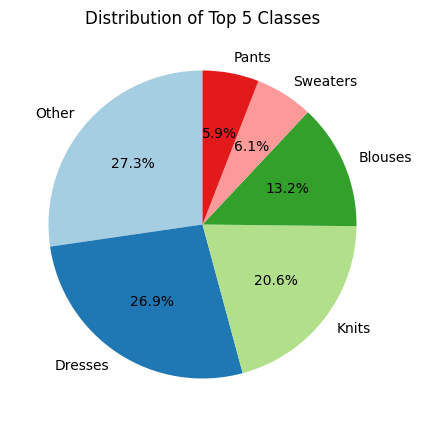

In [9]:
# Get the top 5 most frequent values in the 'Class Name' column
top_classes = df2['Class Name'].value_counts().nlargest(5)

# Create a new column with only the top 5 values and replace others with 'Other'
df2['Class Name Top5'] = df2['Class Name'].where(df2['Class Name'].isin(top_classes.index), 'Other')

# Plot a pie chart
plt.figure(figsize=(5,5))
df2['Class Name Top5'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Top 5 Classes')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

**`Figure 3`** in the article

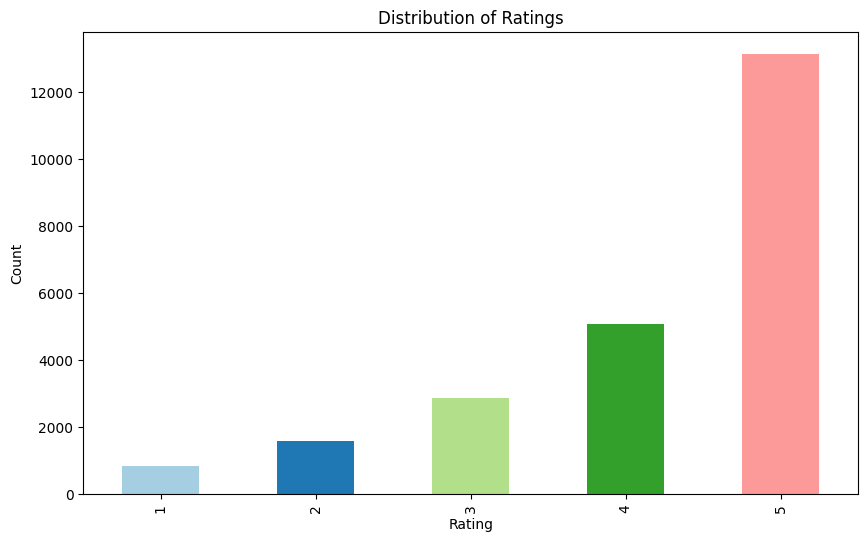

In [10]:
# Plot a bar chart for the 'Rating' column
plt.figure(figsize=(10, 6))
df2['Rating'].value_counts().sort_index().plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Dataset 3: Twitter sentiment analysis for hatred speech detection

### Read

In [11]:
df3_train = pd.read_csv('data/Twitter-Hate-Speech/train.csv')
df3_train = df3_train.drop('id', axis = 1)
df3_train = df3_train.drop_duplicates(keep='first')

df3_test = pd.read_csv('data/Twitter-Hate-Speech/test.csv')
df3_test = df3_test.drop('id', axis=1)
df3_test = df3_test.drop_duplicates(keep='first')

### Overview

In [12]:
df3_train.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

### Visualize

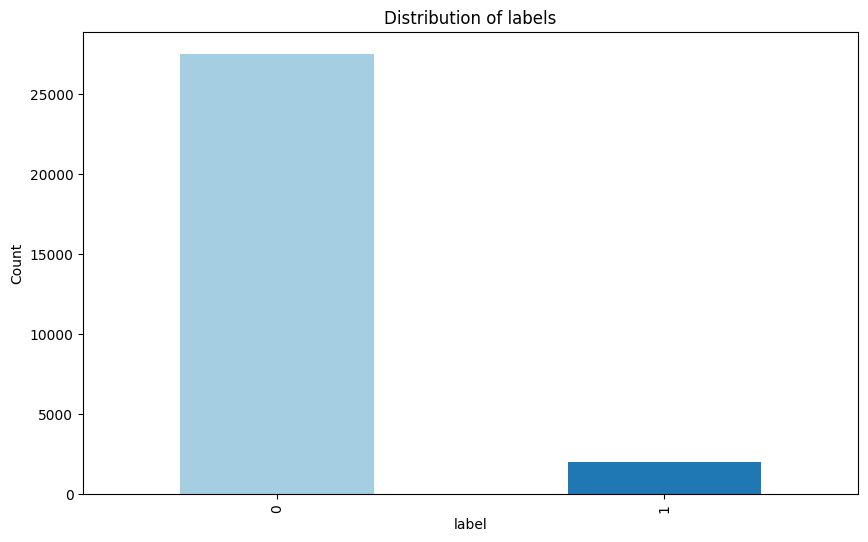

In [13]:
# Plot a bar chart for the 'Rating' column
plt.figure(figsize=(10, 6))
df3_train['label'].value_counts().sort_index().plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribution of labels')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

## Summary

**`Table 1`** in the article:

In [14]:
dataset_name=['Twitter airline sentiment (Dataset 1)', 'Women’s e-commerce clothing reviews (Dataset 2)', 'Twitter sentiment analysis for hatred speech detection (Dataset 3)']
total_records = [df1.shape[0], df2.shape[0], df3_train.shape[0]]
num_classes = [df1['airline_sentiment'].unique().shape[0], df2['Rating'].unique().shape[0], df3_train['label'].unique().shape[0]]

display(pd.DataFrame(data = np.array([dataset_name, total_records, num_classes]).T, columns=['Dataset name', 'Total records', 'No. of classes']))

Dataset name Total records  \
0              Twitter airline sentiment (Dataset 1)         14640   
1    Women’s e-commerce clothing reviews (Dataset 2)         23486   
2  Twitter sentiment analysis for hatred speech d...         29530   

  No. of classes  
0              3  
1              5  
2              2

# Preprocessing

## Functions

In [15]:
def remove_handlers(text):
    """Remove words starting with '@' (handlers/mentions)."""
    text_without_handlers = re.sub(r'@\w+', '', text)
    return text_without_handlers

def tokenize(text):
    """Tokenize the input text."""
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    """Remove stopwords from the list of tokens."""
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

def remove_short_words(tokens, min_length=3):
    """Remove short words (length less than min_length) from the list of tokens."""
    filtered_tokens = [token for token in tokens if len(token) >= min_length]
    return filtered_tokens

def convert_to_lowercase(tokens):
    """Convert all tokens to lowercase."""
    lowercase_tokens = [token.lower() for token in tokens]
    return lowercase_tokens

def perform_lemmatization(tokens):
    """Perform lemmatization on the list of tokens."""
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def remove_special_symbols(tokens):
    """Remove special symbols and bad characters."""
    cleaned_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    return cleaned_tokens

def remove_digits(tokens):
    """Remove digits from the list of tokens."""
    filtered_tokens = [token for token in tokens if not token.isdigit()]
    return filtered_tokens

def process_tweet(tweet):
    """Apply a series of tweet processing steps."""
    tweet_without_handlers = remove_handlers(tweet)
    tokens = tokenize(tweet_without_handlers)
    tokens = remove_stopwords(tokens)
    tokens = remove_short_words(tokens)
    tokens = convert_to_lowercase(tokens)
    tokens = perform_lemmatization(tokens)
    tokens = remove_special_symbols(tokens)
    tokens = remove_digits(tokens)
    return [token for token in tokens if token]

**`Table 3`** in the article

## Example

In [16]:
# Example usage:
before_preprocessing = ["@VirginAmerica plus you’ve added commercials to the experience... tacky.",
          "@VirginAmerica I didn’t today... Must mean I need to take another trip!",
          '@VirginAmerica it’s really aggressive to blast obnoxious "entertainment" in your guests’ faces they have little recourse']

after_preprocessing = [' '.join(process_tweet(tweet)) for tweet in before_preprocessing]

display(pd.DataFrame(data = np.array([before_preprocessing, after_preprocessing]).T, columns=['Before Preprocessing', 'After Preprocessing']))

Before Preprocessing  \
0  @VirginAmerica plus you’ve added commercials t...   
1  @VirginAmerica I didn’t today... Must mean I n...   
2  @VirginAmerica it’s really aggressive to blast...   

                                 After Preprocessing  
0             plus added commercial experience tacky  
1             today must mean need take another trip  
2  really aggressive blast obnoxious entertainmen...

## Run on datasets

In [17]:
df1_processed = [process_tweet(str(tweet)) for tweet in df1['text']]
df1_label = pd.factorize(df1['airline_sentiment'])[0]

df2_processed = [process_tweet(str(tweet)) for tweet in df2['Review Text']]
df2_label = pd.factorize(df2['Rating'])[0]

df3_train_processed = [process_tweet(str(tweet)) for tweet in df3_train['tweet']]
df3_train_label = pd.factorize(df3_train['label'])[0]

df3_test_processed = [process_tweet(str(tweet)) for tweet in df3_train['tweet']]
df3_test_label = pd.factorize(df3_train['label'])[0]

## Train/Test Split

In [18]:
tokens_train1, tokens_test1, y_train1, y_test1 = train_test_split(df1_processed, df1_label, test_size=0.3)
tokens_train2, tokens_test2, y_train2, y_test2 = train_test_split(df2_processed, df2_label, test_size=0.3)

# Dataset 3 is already splitted, so we only rename the variables for this dataset (for the sake of uniformity)
tokens_train3, tokens_test3, y_train3, y_test3 = df3_train_processed, df3_test_processed, df3_train_label, df3_test_label

# Vectorization

## TF-IDF

In [19]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features= 300)

# Dataset1 ************************************************************
# Convert token lists into string
text_train1 = [' '.join(token_list) for token_list in tokens_train1]
text_test1 = [' '.join(token_list) for token_list in tokens_test1]

# Fit and transform the text list
tfidf_train1 = vectorizer.fit_transform(text_train1).toarray()
tfidf_test1 = vectorizer.transform(text_test1).toarray()

# Dataset2 ************************************************************
# Convert token lists into string
text_train2 = [' '.join(token_list) for token_list in tokens_train2]
text_test2 = [' '.join(token_list) for token_list in tokens_test2]

# Fit and transform the text list
tfidf_train2 = vectorizer.fit_transform(text_train2).toarray()
tfidf_test2 = vectorizer.transform(text_test2).toarray()

# Dataset3 ************************************************************
# Convert token lists into string
text_train3 = [' '.join(token_list) for token_list in tokens_train3]
text_test3 = [' '.join(token_list) for token_list in tokens_test3]

# Fit and transform the text list
tfidf_train3 = vectorizer.fit_transform(text_train3).toarray()
tfidf_test3 = vectorizer.transform(text_test3).toarray()

## Word2Vec

In [20]:
def get_vector(token_list, word2vec_model):
    """
    Get the mean vector representation of a token list using a Word2Vec model.

    Parameters:
    - token_list (list[str]): List of tokens.
    - word2vec_model (Word2Vec): Word2Vec model.

    Returns:
    - list[float]: Mean vector representation of the input token list.
    """
    vectors = [word2vec_model.wv[token] for token in token_list if token in word2vec_model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        # If none of the tokens are in the vocabulary, consider a zero vector
        return [0] * word2vec_model.vector_size

In [21]:
# Dataset1 ************************************************************
# Train the w2v model and extract the vectors
w2v_model1 = Word2Vec(sentences=tokens_train1, vector_size=100, window=5, min_count=1, workers=4)

w2v_train1 = np.array([get_vector(token_list, w2v_model1) for token_list in tokens_train1])
w2v_test1 = np.array([get_vector(token_list, w2v_model1) for token_list in tokens_test1])

# Dataset2 ************************************************************
# Train the w2v model and extract the vectors
w2v_model2 = Word2Vec(sentences=tokens_train2, vector_size=200, window=5, min_count=2, workers=4)

w2v_train2 = np.array([get_vector(token_list, w2v_model2) for token_list in tokens_train2])
w2v_test2 = np.array([get_vector(token_list, w2v_model2) for token_list in tokens_test2])

# Dataset3 ************************************************************
# Train the w2v model and extract the vectors
w2v_model3 = Word2Vec(sentences=tokens_train3, vector_size=300, window=5, min_count=3, workers=4)

w2v_train3 = np.array([get_vector(token_list, w2v_model3) for token_list in tokens_train3])
w2v_test3 = np.array([get_vector(token_list, w2v_model3) for token_list in tokens_test3])

## Sequence

In [22]:
tokenizer = Tokenizer()

# Dataset1 ************************************************************
# Tokenize the text data
tokenizer.fit_on_texts(text_train1)
vocab_size1 = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_sequence_length = 100 # Needed for padding sequences

# Convert text to sequences and pad them
# Train set
seq_train1 = tokenizer.texts_to_sequences(text_train1)
seq_train1 = pad_sequences(seq_train1, maxlen=max_sequence_length)

# Test set
seq_test1 = tokenizer.texts_to_sequences(text_test1)
seq_test1 = pad_sequences(seq_test1, maxlen=max_sequence_length)

# Dataset2 ************************************************************
# Tokenize the text data
tokenizer.fit_on_texts(text_train2)
vocab_size2 = len(tokenizer.word_index) + 1  # Adding 2 because of reserved 0 index
max_sequence_length = 100 # Needed for padding sequences

# Convert text to sequences and pad them
# Train set
seq_train2 = tokenizer.texts_to_sequences(text_train2)
seq_train2 = pad_sequences(seq_train2, maxlen=max_sequence_length)

# Test set
seq_test2 = tokenizer.texts_to_sequences(text_test2)
seq_test2 = pad_sequences(seq_test2, maxlen=max_sequence_length)

# Dataset3 ************************************************************
# Tokenize the text data
tokenizer.fit_on_texts(text_train3)
vocab_size3 = len(tokenizer.word_index) + 1  # Adding 3 because of reserved 0 index
max_sequence_length = 100 # Needed for padding sequences

# Convert text to sequences and pad them
# Train set
seq_train3 = tokenizer.texts_to_sequences(text_train3)
seq_train3 = pad_sequences(seq_train3, maxlen=max_sequence_length)

# Test set
seq_test3 = tokenizer.texts_to_sequences(text_test3)
seq_test3 = pad_sequences(seq_test3, maxlen=max_sequence_length)

# Deep Models


In [23]:
results_deep = {'accuracy':  {'LSTM':[None, None, None], 'CNN_LSTM':[None, None, None], 'VD_CNN':[None, None, None]},
                'precision': {'LSTM':[None, None, None], 'CNN_LSTM':[None, None, None], 'VD_CNN':[None, None, None]},
                'recall':    {'LSTM':[None, None, None], 'CNN_LSTM':[None, None, None], 'VD_CNN':[None, None, None]},
                'f1_score':  {'LSTM':[None, None, None], 'CNN_LSTM':[None, None, None], 'VD_CNN':[None, None, None]}}

## CNN-LSTM

In [24]:
def create_cnn_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size):
    # Define the model
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

    # Convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM layer
    model.add(LSTM(100))

    # Dense layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

### Dataset 1

In [25]:
# Assign model parameters
num_classes = np.unique(y_train1).shape[0]
embedding_dim = 50

# Create model
model = create_cnn_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size1)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           519350    
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            9664      
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [26]:
# Train the model
history = model.fit(seq_train1, y_train1, epochs=5, batch_size=32, validation_split=0.2)
history.history.keys()

Epoch 1/5
257/257 [==============================] - 21s 67ms/step - loss: 0.7548 - accuracy: 0.6694 - val_loss: 0.6614 - val_accuracy: 0.7034
Epoch 2/5
257/257 [==============================] - 15s 59ms/step - loss: 0.4991 - accuracy: 0.7974 - val_loss: 0.6018 - val_accuracy: 0.7522
Epoch 3/5
257/257 [==============================] - 15s 60ms/step - loss: 0.3198 - accuracy: 0.8811 - val_loss: 0.6817 - val_accuracy: 0.7571
Epoch 4/5
257/257 [==============================] - 15s 59ms/step - loss: 0.1750 - accuracy: 0.9382 - val_loss: 0.8379 - val_accuracy: 0.7337
Epoch 5/5
257/257 [==============================] - 15s 59ms/step - loss: 0.1058 - accuracy: 0.9641 - val_loss: 1.0201 - val_accuracy: 0.7249


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

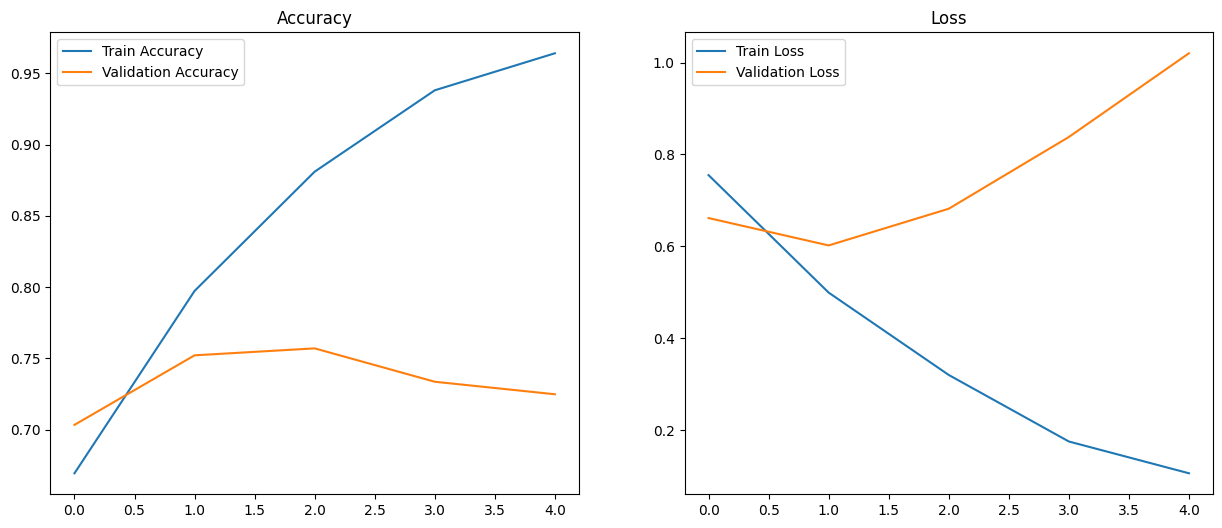

In [27]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [28]:
prob_pred = model.predict(seq_test1)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['CNN_LSTM'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_deep['recall']['CNN_LSTM'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_deep['f1_score']['CNN_LSTM'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_deep['accuracy']['CNN_LSTM'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

138/138 [==============================] - 3s 14ms/step


In [29]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [None, None, None]  [None, None, None]  [None, None, None]   
CNN_LSTM  [0.75, None, None]  [0.69, None, None]  [0.69, None, None]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [None, None, None]  
CNN_LSTM  [0.69, None, None]  
VD_CNN    [None, None, None]

### Dataset 2

In [30]:
# Assign model parameters
num_classes = np.unique(y_train2).shape[0]
embedding_dim = 50

# Create model
model = create_cnn_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size2)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           982100    
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 64)            9664      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 49, 64)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                      

In [31]:
# Train the model
history = model.fit(seq_train2, y_train2, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
411/411 [==============================] - 29s 65ms/step - loss: 1.0097 - accuracy: 0.5977 - val_loss: 0.8924 - val_accuracy: 0.6238
Epoch 2/5
411/411 [==============================] - 25s 61ms/step - loss: 0.8220 - accuracy: 0.6534 - val_loss: 0.8801 - val_accuracy: 0.6463
Epoch 3/5
411/411 [==============================] - 26s 64ms/step - loss: 0.6963 - accuracy: 0.7121 - val_loss: 0.9042 - val_accuracy: 0.6305
Epoch 4/5
411/411 [==============================] - 26s 62ms/step - loss: 0.5777 - accuracy: 0.7672 - val_loss: 1.0031 - val_accuracy: 0.6116
Epoch 5/5
411/411 [==============================] - 25s 60ms/step - loss: 0.4710 - accuracy: 0.8174 - val_loss: 1.1325 - val_accuracy: 0.6177


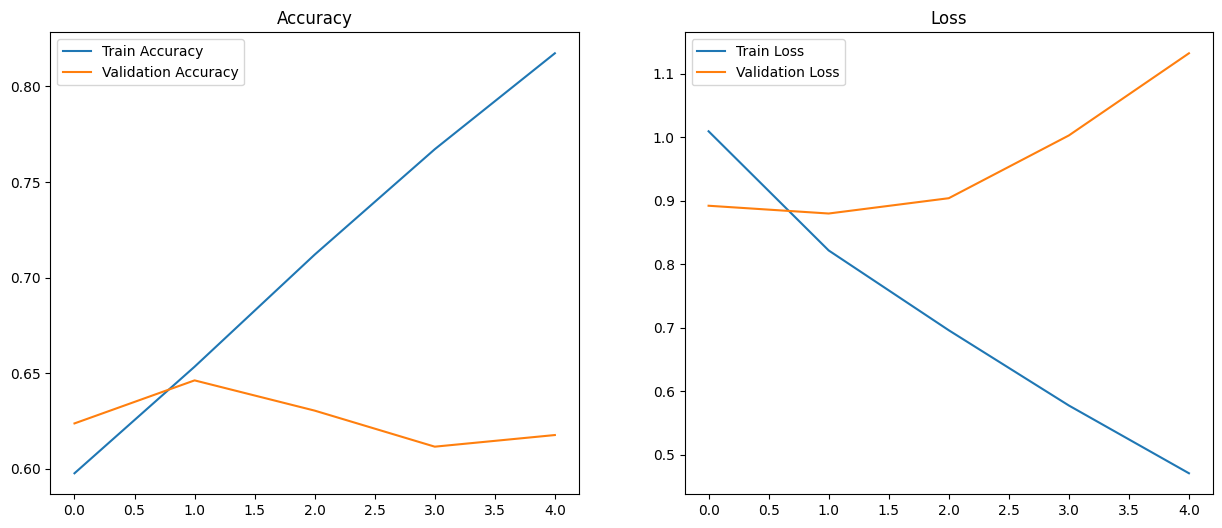

In [32]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [33]:
prob_pred = model.predict(seq_test2)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['CNN_LSTM'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_deep['recall']['CNN_LSTM'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_deep['f1_score']['CNN_LSTM'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_deep['accuracy']['CNN_LSTM'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

221/221 [==============================] - 5s 18ms/step


In [34]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [None, None, None]  [None, None, None]  [None, None, None]   
CNN_LSTM  [0.75, 0.59, None]  [0.69, 0.48, None]  [0.69, 0.37, None]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [None, None, None]  
CNN_LSTM  [0.69, 0.38, None]  
VD_CNN    [None, None, None]

### Dataset 3

In [35]:
# Assign model parameters
num_classes = np.unique(y_train3).shape[0]
embedding_dim = 50

# Create model
model = create_cnn_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size3)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           2460950   
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 64)            9664      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 49, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                      

In [36]:
# Train the model
history = model.fit(seq_train3, y_train3, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
739/739 [==============================] - 66s 86ms/step - loss: 0.1724 - accuracy: 0.9452 - val_loss: 0.1257 - val_accuracy: 0.9533
Epoch 2/5
739/739 [==============================] - 62s 83ms/step - loss: 0.0609 - accuracy: 0.9790 - val_loss: 0.1275 - val_accuracy: 0.9585
Epoch 3/5
739/739 [==============================] - 62s 84ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.1729 - val_accuracy: 0.9597
Epoch 4/5
739/739 [==============================] - 62s 84ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.2180 - val_accuracy: 0.9528
Epoch 5/5
739/739 [==============================] - 62s 84ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.3142 - val_accuracy: 0.9426


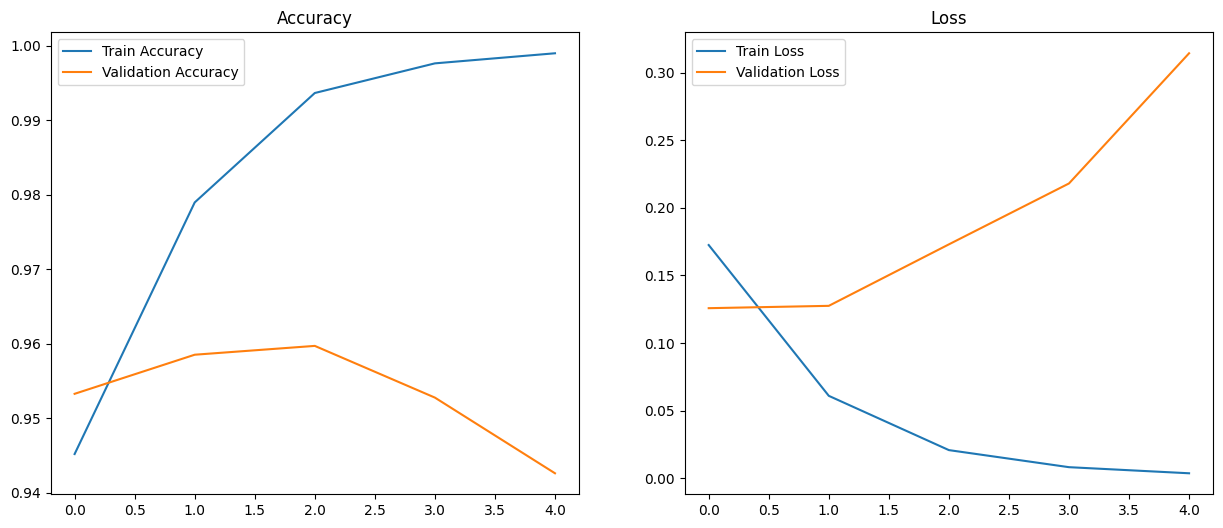

In [37]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [38]:
prob_pred = model.predict(seq_test3)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['CNN_LSTM'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_deep['recall']['CNN_LSTM'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_deep['f1_score']['CNN_LSTM'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_deep['accuracy']['CNN_LSTM'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

923/923 [==============================] - 15s 16ms/step


In [39]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [None, None, None]  [None, None, None]  [None, None, None]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [None, None, None]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [None, None, None]

## LSTM

In [40]:
def create_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size):
    # Define the model
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

    # LSTM layer
    model.add(LSTM(100))

    # Dense layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

### Dataset 1

In [41]:
# Assign model parameters
num_classes = np.unique(y_train1).shape[0]
embedding_dim = 50

# Create model
model = create_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size1)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           519350    
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dense_6 (Dense)             (None, 64)                6464      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 586409 (2.24 MB)
Trainable params: 586409 (2.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [42]:
# Train the model
history = model.fit(seq_train1, y_train1, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
257/257 [==============================] - 25s 89ms/step - loss: 0.7308 - accuracy: 0.6983 - val_loss: 0.6098 - val_accuracy: 0.7566
Epoch 2/5
257/257 [==============================] - 26s 99ms/step - loss: 0.4367 - accuracy: 0.8317 - val_loss: 0.5967 - val_accuracy: 0.7644
Epoch 3/5
257/257 [==============================] - 24s 92ms/step - loss: 0.2773 - accuracy: 0.9003 - val_loss: 0.6896 - val_accuracy: 0.7488
Epoch 4/5
257/257 [==============================] - 23s 90ms/step - loss: 0.1891 - accuracy: 0.9306 - val_loss: 0.8504 - val_accuracy: 0.7254
Epoch 5/5
257/257 [==============================] - 24s 93ms/step - loss: 0.1329 - accuracy: 0.9513 - val_loss: 1.0125 - val_accuracy: 0.7332


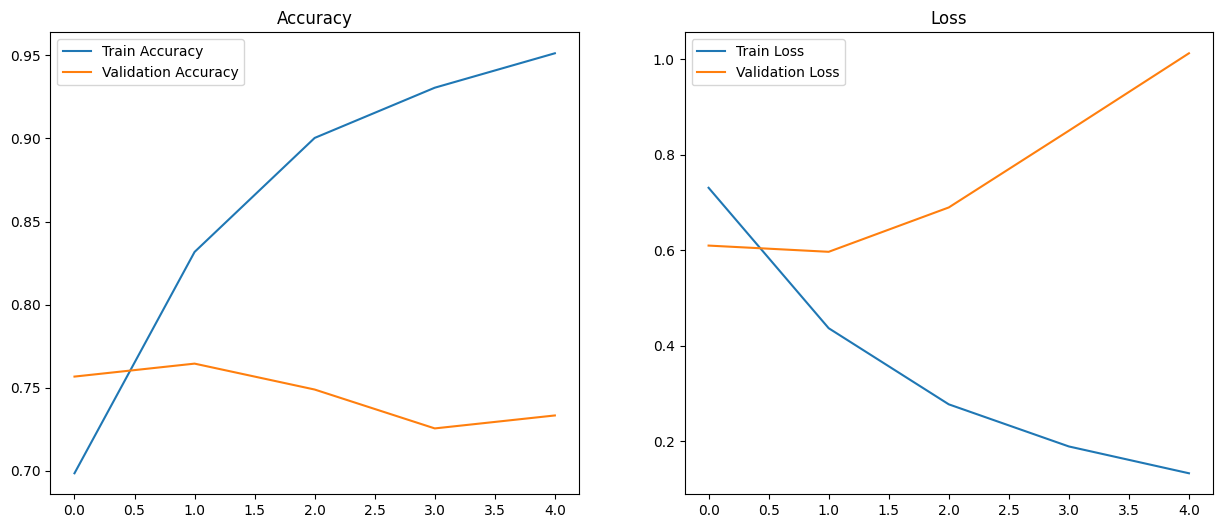

In [43]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [44]:
prob_pred = model.predict(seq_test1)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['LSTM'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_deep['recall']['LSTM'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_deep['f1_score']['LSTM'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_deep['accuracy']['LSTM'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

138/138 [==============================] - 4s 21ms/step


In [45]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, None, None]  [0.68, None, None]  [0.66, None, None]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [0.67, None, None]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [None, None, None]

### Dataset 2

In [46]:
# Assign model parameters
num_classes = np.unique(y_train2).shape[0]
embedding_dim = 50

# Create model
model = create_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size2)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           982100    
                                                                 
 lstm_4 (LSTM)               (None, 100)               60400     
                                                                 
 dense_8 (Dense)             (None, 64)                6464      
                                                                 
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1049289 (4.00 MB)
Trainable params: 1049289 (4.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
# Train the model
history = model.fit(seq_train2, y_train2, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
411/411 [==============================] - 41s 94ms/step - loss: 0.9999 - accuracy: 0.6062 - val_loss: 0.8948 - val_accuracy: 0.6241
Epoch 2/5
411/411 [==============================] - 35s 85ms/step - loss: 0.8183 - accuracy: 0.6613 - val_loss: 0.8842 - val_accuracy: 0.6384
Epoch 3/5
411/411 [==============================] - 35s 85ms/step - loss: 0.7151 - accuracy: 0.7067 - val_loss: 0.8959 - val_accuracy: 0.6475
Epoch 4/5
411/411 [==============================] - 38s 93ms/step - loss: 0.6245 - accuracy: 0.7524 - val_loss: 0.9730 - val_accuracy: 0.6220
Epoch 5/5
411/411 [==============================] - 35s 85ms/step - loss: 0.5414 - accuracy: 0.7941 - val_loss: 1.0993 - val_accuracy: 0.6031


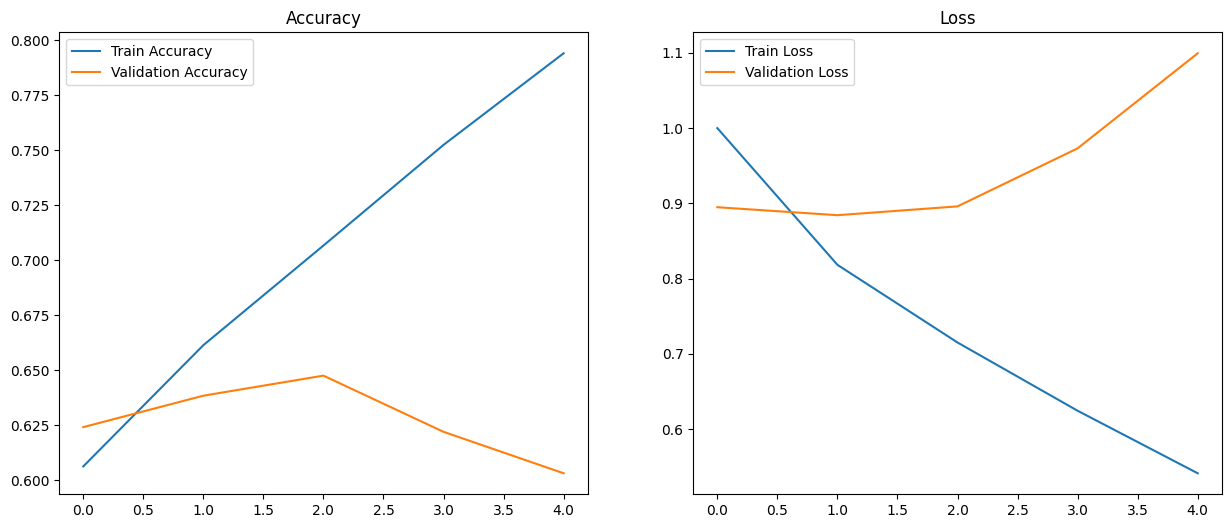

In [48]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [49]:
prob_pred = model.predict(seq_test2)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['LSTM'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_deep['recall']['LSTM'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_deep['f1_score']['LSTM'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_deep['accuracy']['LSTM'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

221/221 [==============================] - 5s 22ms/step


In [50]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, 0.59, None]  [0.68, 0.42, None]  [0.66, 0.41, None]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [0.67, 0.41, None]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [None, None, None]

### Dataset 3

In [51]:
# Assign model parameters
num_classes = np.unique(y_train3).shape[0]
embedding_dim = 50

# Create model
model = create_lstm_model(num_classes, max_sequence_length, embedding_dim, vocab_size3)
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 50)           2460950   
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dense_10 (Dense)            (None, 64)                6464      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 2527944 (9.64 MB)
Trainable params: 2527944 (9.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
# Train the model
history = model.fit(seq_train3, y_train3, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
739/739 [==============================] - 88s 115ms/step - loss: 0.1691 - accuracy: 0.9446 - val_loss: 0.1268 - val_accuracy: 0.9539
Epoch 2/5
739/739 [==============================] - 85s 115ms/step - loss: 0.0623 - accuracy: 0.9784 - val_loss: 0.1377 - val_accuracy: 0.9561
Epoch 3/5
739/739 [==============================] - 88s 119ms/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 0.1767 - val_accuracy: 0.9523
Epoch 4/5
739/739 [==============================] - 85s 115ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.2521 - val_accuracy: 0.9502
Epoch 5/5
739/739 [==============================] - 85s 115ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.2408 - val_accuracy: 0.9487


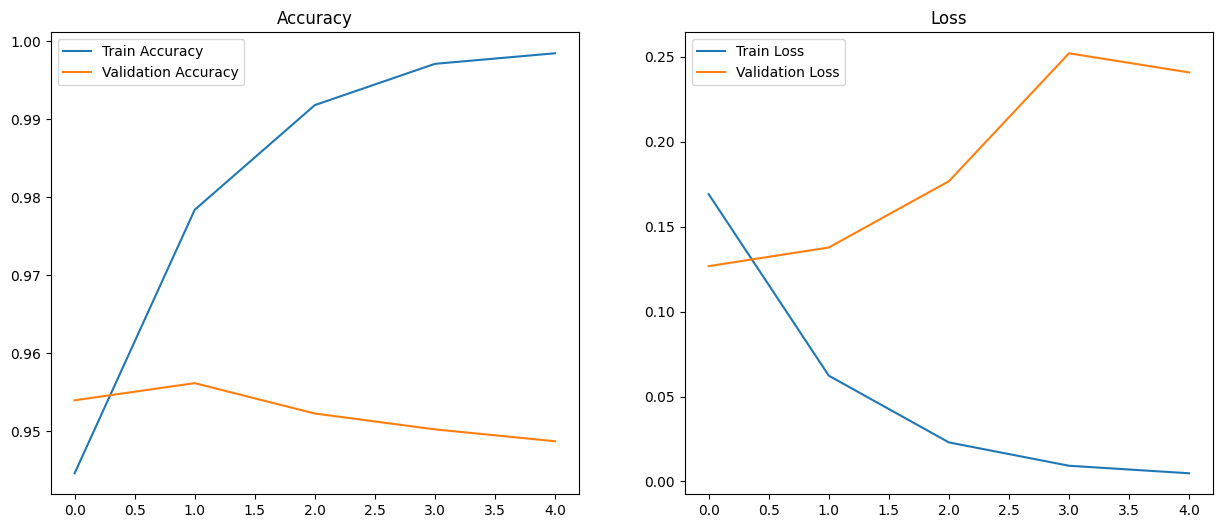

In [53]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [54]:
prob_pred = model.predict(seq_test3)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['LSTM'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_deep['recall']['LSTM'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_deep['f1_score']['LSTM'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_deep['accuracy']['LSTM'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

923/923 [==============================] - 24s 25ms/step


In [55]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, 0.59, 0.99]  [0.68, 0.42, 0.96]  [0.66, 0.41, 0.96]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN    [None, None, None]  [None, None, None]  [None, None, None]   

                    f1_score  
LSTM      [0.67, 0.41, 0.96]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [None, None, None]

## VDCNN

In [56]:
def create_vdcnn_model(num_classes, max_sequence_length, embedding_dim, vocab_size):
    # Define the model
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

    # Convolutional layers with increasing filter sizes
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    # GlobalMaxPooling layer
    model.add(GlobalMaxPooling1D())

    # Dense layers
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

### Dataset 1

In [57]:
# Assign model parameters
num_classes = np.unique(y_train1).shape[0]
embedding_dim = 50

# Create model
model = create_vdcnn_model(num_classes, max_sequence_length, embedding_dim, vocab_size1)
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 50)           519350    
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 64)           9664      
                                                                 
 conv1d_4 (Conv1D)           (None, 100, 64)           12352     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 50, 128)           24704     
                                                                 
 conv1d_6 (Conv1D)           (None, 50, 128)           49280     
                                                      

In [58]:
# Train the model
history = model.fit(seq_train1, y_train1, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
257/257 [==============================] - 83s 313ms/step - loss: 0.7798 - accuracy: 0.6610 - val_loss: 0.7111 - val_accuracy: 0.6829
Epoch 2/5
257/257 [==============================] - 79s 306ms/step - loss: 0.5708 - accuracy: 0.7368 - val_loss: 0.6922 - val_accuracy: 0.7010
Epoch 3/5
257/257 [==============================] - 76s 296ms/step - loss: 0.4244 - accuracy: 0.8297 - val_loss: 0.6926 - val_accuracy: 0.7410
Epoch 4/5
257/257 [==============================] - 76s 297ms/step - loss: 0.3074 - accuracy: 0.8864 - val_loss: 0.8270 - val_accuracy: 0.7371
Epoch 5/5
257/257 [==============================] - 77s 299ms/step - loss: 0.2314 - accuracy: 0.9222 - val_loss: 0.9615 - val_accuracy: 0.7078


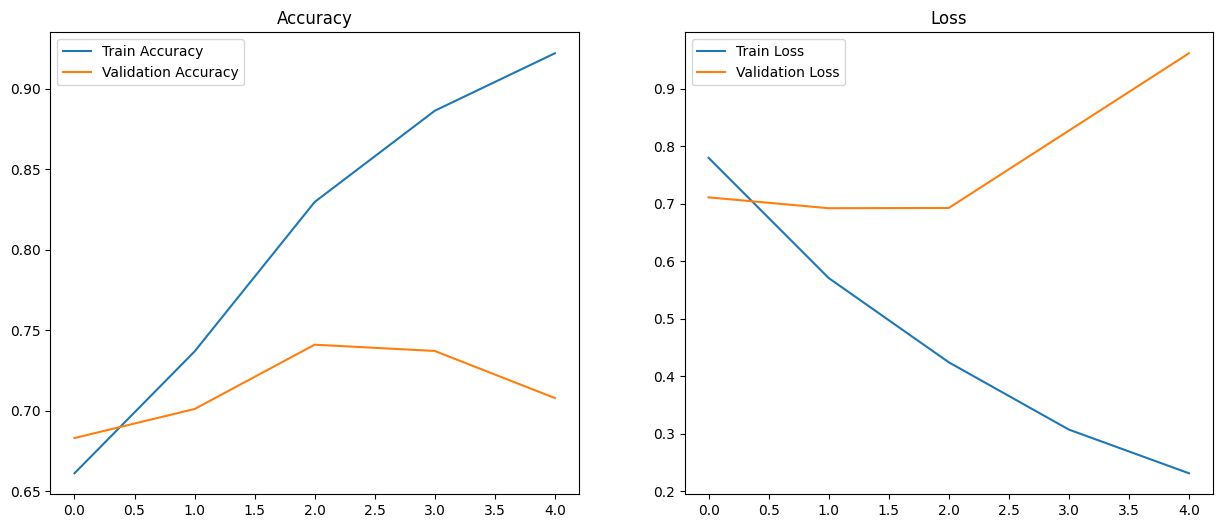

In [59]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [60]:
prob_pred = model.predict(seq_test1)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['VD_CNN'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_deep['recall']['VD_CNN'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_deep['f1_score']['VD_CNN'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_deep['accuracy']['VD_CNN'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

138/138 [==============================] - 7s 47ms/step


In [61]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, 0.59, 0.99]  [0.68, 0.42, 0.96]  [0.66, 0.41, 0.96]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN    [0.74, None, None]   [0.7, None, None]   [0.7, None, None]   

                    f1_score  
LSTM      [0.67, 0.41, 0.96]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [0.69, None, None]

### Dataset 2

In [62]:
# Assign model parameters
num_classes = np.unique(y_train2).shape[0]
embedding_dim = 50

# Create model
model = create_vdcnn_model(num_classes, max_sequence_length, embedding_dim, vocab_size2)
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 50)           982100    
                                                                 
 conv1d_13 (Conv1D)          (None, 100, 64)           9664      
                                                                 
 conv1d_14 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 50, 128)           24704     
                                                                 
 conv1d_16 (Conv1D)          (None, 50, 128)           49280     
                                                      

In [63]:
# Train the model
history = model.fit(seq_train2, y_train2, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
411/411 [==============================] - 132s 312ms/step - loss: 1.0991 - accuracy: 0.5817 - val_loss: 0.9417 - val_accuracy: 0.6095
Epoch 2/5
411/411 [==============================] - 126s 307ms/step - loss: 0.8844 - accuracy: 0.6363 - val_loss: 0.9116 - val_accuracy: 0.6283
Epoch 3/5
411/411 [==============================] - 127s 309ms/step - loss: 0.7845 - accuracy: 0.6704 - val_loss: 0.9404 - val_accuracy: 0.6171
Epoch 4/5
411/411 [==============================] - 127s 308ms/step - loss: 0.6874 - accuracy: 0.7123 - val_loss: 1.0167 - val_accuracy: 0.6186
Epoch 5/5
411/411 [==============================] - 127s 309ms/step - loss: 0.6009 - accuracy: 0.7481 - val_loss: 1.1441 - val_accuracy: 0.6128


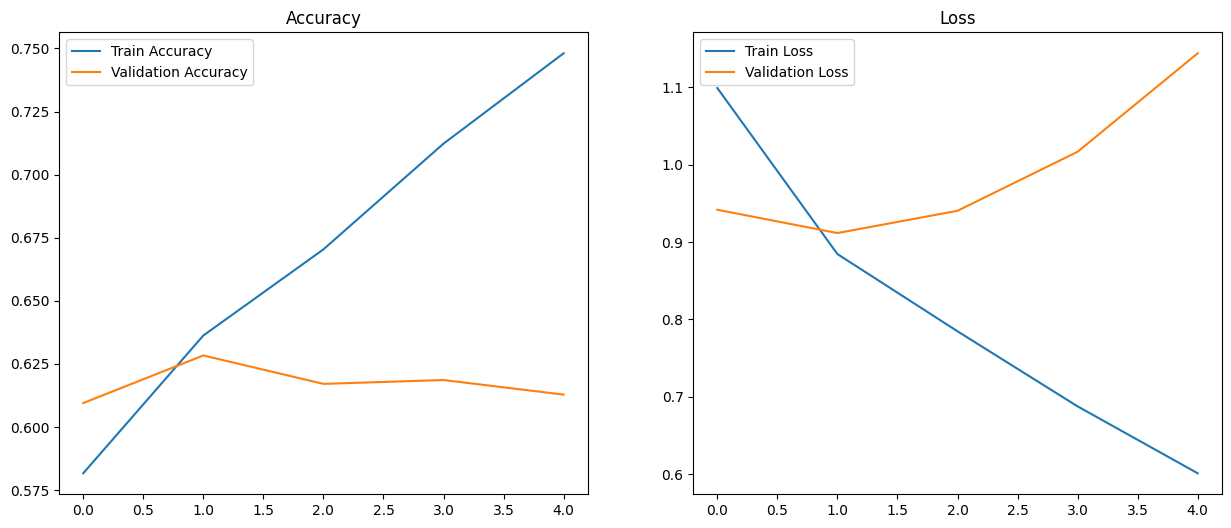

In [64]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [65]:
prob_pred = model.predict(seq_test2)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['VD_CNN'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_deep['recall']['VD_CNN'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_deep['f1_score']['VD_CNN'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_deep['accuracy']['VD_CNN'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

221/221 [==============================] - 13s 58ms/step


In [66]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, 0.59, 0.99]  [0.68, 0.42, 0.96]  [0.66, 0.41, 0.96]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN     [0.74, 0.6, None]   [0.7, 0.36, None]   [0.7, 0.36, None]   

                    f1_score  
LSTM      [0.67, 0.41, 0.96]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [0.69, 0.36, None]

### Dataset 3

In [67]:
# Assign model parameters
num_classes = np.unique(y_train3).shape[0]
embedding_dim = 50

# Create model
model = create_vdcnn_model(num_classes, max_sequence_length, embedding_dim, vocab_size3)
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 50)           2460950   
                                                                 
 conv1d_23 (Conv1D)          (None, 100, 64)           9664      
                                                                 
 conv1d_24 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 50, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 50, 128)           24704     
                                                                 
 conv1d_26 (Conv1D)          (None, 50, 128)           49280     
                                                      

In [68]:
# Train the model
history = model.fit(seq_train3, y_train3, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
739/739 [==============================] - 248s 331ms/step - loss: 0.1907 - accuracy: 0.9418 - val_loss: 0.1568 - val_accuracy: 0.9328
Epoch 2/5
739/739 [==============================] - 240s 325ms/step - loss: 0.0804 - accuracy: 0.9743 - val_loss: 0.1515 - val_accuracy: 0.9560
Epoch 3/5
739/739 [==============================] - 239s 322ms/step - loss: 0.0548 - accuracy: 0.9859 - val_loss: 1.1302 - val_accuracy: 0.9539
Epoch 4/5
739/739 [==============================] - 236s 320ms/step - loss: 0.0474 - accuracy: 0.9920 - val_loss: 0.1938 - val_accuracy: 0.9495
Epoch 5/5
739/739 [==============================] - 238s 322ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.3394 - val_accuracy: 0.9583


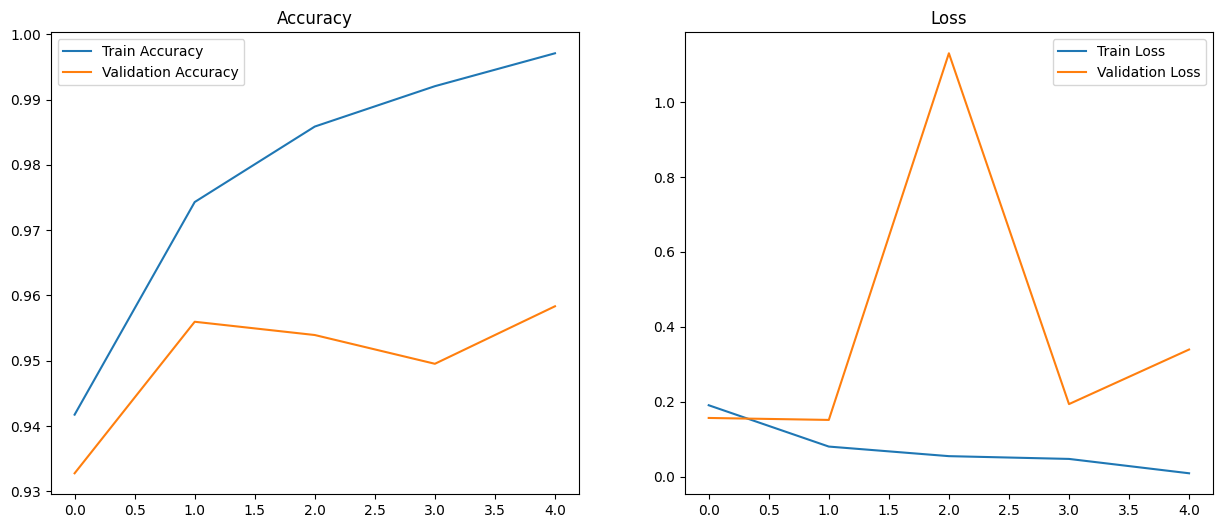

In [69]:
# Plot the error and accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [70]:
prob_pred = model.predict(seq_test3)
y_pred = np.argmax(prob_pred, axis=1)

# Calculate precision, recall, and F1 score for macro average
results_deep['precision']['VD_CNN'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_deep['recall']['VD_CNN'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_deep['f1_score']['VD_CNN'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_deep['accuracy']['VD_CNN'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

923/923 [==============================] - 53s 57ms/step


In [71]:
pd.DataFrame(results_deep)

accuracy           precision              recall  \
LSTM      [0.76, 0.59, 0.99]  [0.68, 0.42, 0.96]  [0.66, 0.41, 0.96]   
CNN_LSTM  [0.75, 0.59, 0.99]  [0.69, 0.48, 0.95]  [0.69, 0.37, 0.96]   
VD_CNN     [0.74, 0.6, 0.99]   [0.7, 0.36, 0.98]   [0.7, 0.36, 0.95]   

                    f1_score  
LSTM      [0.67, 0.41, 0.96]  
CNN_LSTM  [0.69, 0.38, 0.95]  
VD_CNN    [0.69, 0.36, 0.96]

## Save results

In [72]:
# Assuming results_tfidf, results_w2v, results_tfidf_ds1, and results_w2v_ds1 are dictionaries

# Convert dictionaries to dataframes
df_deep = pd.DataFrame(results_deep)

# Save as CSV
df_deep.to_csv('results_deep.csv', index=False)

# Save as pickle
with open('results_deep.pkl', 'wb') as f:
    pickle.dump(results_deep, f)

# ML models

In [73]:
results_tfidf = {'accuracy': {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'precision':{'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'recall':   {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'f1_score': {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]}}

results_w2v  =  {'accuracy': {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'precision':{'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'recall':   {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]},
                 'f1_score': {'LR':[None, None, None], 'RF':[None, None, None], 'SGD':[None, None, None], 'SVC':[None, None, None], 'VC':[None, None, None]}}

results_tfidf_ds1 = {'precision':{'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]},
                      'recall':   {'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]},
                      'f1_score': {'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]}}

results_w2v_ds1 = {'precision':{'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]},
                      'recall':   {'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]},
                      'f1_score': {'LR':[None, None, None, None], 'RF':[None, None, None, None], 'SGD':[None, None, None, None], 'SVC':[None, None, None, None], 'VC':[None, None, None, None]}}



## Logistic Regression

### TF-IDF

#### Dataset 1

In [74]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(tfidf_train1, y_train1)

# Make predictions
y_pred = logistic_regression.predict(tfidf_test1)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['LR'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['recall']['LR'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['f1_score']['LR'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['accuracy']['LR'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_tfidf_ds1['precision']['LR'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['precision']['LR'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['recall']['LR'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['recall']['LR'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['f1_score']['LR'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['f1_score']['LR'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

#### Dataset 2

In [75]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(tfidf_train2, y_train2)

# Make predictions
y_pred = logistic_regression.predict(tfidf_test2)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['LR'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['recall']['LR'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['f1_score']['LR'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['accuracy']['LR'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

#### Dataset 3

In [76]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(tfidf_train3, y_train3)

# Make predictions
y_pred = logistic_regression.predict(tfidf_test3)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['LR'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['recall']['LR'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['f1_score']['LR'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['accuracy']['LR'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

### Word2Vec

#### Dataset 1

In [77]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(w2v_train1, y_train1)

# Make predictions
y_pred = logistic_regression.predict(w2v_test1)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['LR'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_w2v['recall']['LR'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_w2v['f1_score']['LR'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_w2v['accuracy']['LR'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_w2v_ds1['precision']['LR'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['precision']['LR'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['recall']['LR'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['recall']['LR'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['f1_score']['LR'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['f1_score']['LR'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

#### Dataset 2

In [78]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(w2v_train2, y_train2)

# Make predictions
y_pred = logistic_regression.predict(w2v_test2)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['LR'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_w2v['recall']['LR'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_w2v['f1_score']['LR'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_w2v['accuracy']['LR'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

#### Dataset 3

In [79]:
# Initialize the Logistic Regression model for multiclass classification
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(w2v_train3, y_train3)

# Make predictions
y_pred = logistic_regression.predict(w2v_test3)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['LR'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_w2v['recall']['LR'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_w2v['f1_score']['LR'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_w2v['accuracy']['LR'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

## Random Forest

### TF-IDF

#### Dataset 1

In [80]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(tfidf_train1, y_train1)

# Make predictions
y_pred = random_forest.predict(tfidf_test1)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['RF'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['recall']['RF'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['f1_score']['RF'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['accuracy']['RF'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_tfidf_ds1['precision']['RF'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['precision']['RF'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['recall']['RF'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['recall']['RF'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['f1_score']['RF'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['f1_score']['RF'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

#### Dataset 2

In [81]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(tfidf_train2, y_train2)

# Make predictions
y_pred = random_forest.predict(tfidf_test2)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['RF'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['recall']['RF'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['f1_score']['RF'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['accuracy']['RF'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

#### Dataset 3

In [82]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(tfidf_train3, y_train3)

# Make predictions
y_pred = random_forest.predict(tfidf_test3)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['RF'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['recall']['RF'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['f1_score']['RF'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['accuracy']['RF'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

### Word2Vec

#### Dataset 1

In [83]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(w2v_train1, y_train1)

# Make predictions
y_pred = random_forest.predict(w2v_test1)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['RF'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_w2v['recall']['RF'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_w2v['f1_score']['RF'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_w2v['accuracy']['RF'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_w2v_ds1['precision']['RF'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['precision']['RF'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['recall']['RF'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['recall']['RF'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['f1_score']['RF'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['f1_score']['RF'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

#### Dataset 2

In [84]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(w2v_train2, y_train2)

# Make predictions
y_pred = random_forest.predict(w2v_test2)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['RF'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_w2v['recall']['RF'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_w2v['f1_score']['RF'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_w2v['accuracy']['RF'][1] = np.round(accuracy_score(y_test2, y_pred), 2)

#### Dataset 3

In [85]:
# Initialize the Logistic Regression model for multiclass classification
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(w2v_train3, y_train3)

# Make predictions
y_pred = random_forest.predict(w2v_test3)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['RF'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_w2v['recall']['RF'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_w2v['f1_score']['RF'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_w2v['accuracy']['RF'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

## Stochastic Gradient Descent

### TF-IDF

#### Dataset 1


In [86]:
# Initialize the Stochastic Gradient Descent model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(tfidf_train1, y_train1)

# Make predictions
y_pred = sgd_clf.predict(tfidf_test1)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SGD'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['recall']['SGD'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SGD'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SGD'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_tfidf_ds1['precision']['SGD'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['precision']['SGD'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['recall']['SGD'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['recall']['SGD'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['f1_score']['SGD'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['f1_score']['SGD'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)



#### Dataset 2


In [87]:
# Initialize the Logistic Regression model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(tfidf_train2, y_train2)

# Make predictions
y_pred = sgd_clf.predict(tfidf_test2)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SGD'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['recall']['SGD'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SGD'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SGD'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [88]:
# Initialize the Logistic Regression model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(tfidf_train3, y_train3)

# Make predictions
y_pred = sgd_clf.predict(tfidf_test3)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SGD'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['recall']['SGD'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SGD'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SGD'][2] = np.round(accuracy_score(y_test3, y_pred), 2)



### Word2Vec


#### Dataset 1


In [89]:
# Initialize the Logistic Regression model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(w2v_train1, y_train1)

# Make predictions
y_pred = sgd_clf.predict(w2v_test1)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SGD'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_w2v['recall']['SGD'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_w2v['f1_score']['SGD'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_w2v['accuracy']['SGD'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_w2v_ds1['precision']['SGD'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['precision']['SGD'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['recall']['SGD'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['recall']['SGD'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['f1_score']['SGD'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['f1_score']['SGD'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)



#### Dataset 2

In [90]:
# Initialize the Logistic Regression model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(w2v_train2, y_train2)

# Make predictions
y_pred = sgd_clf.predict(w2v_test2)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SGD'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_w2v['recall']['SGD'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_w2v['f1_score']['SGD'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_w2v['accuracy']['SGD'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [91]:

# Initialize the Logistic Regression model for multiclass classification
sgd_clf = SGDClassifier(loss='log_loss')

# Train the model
sgd_clf.fit(w2v_train3, y_train3)

# Make predictions
y_pred = sgd_clf.predict(w2v_test3)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SGD'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_w2v['recall']['SGD'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_w2v['f1_score']['SGD'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_w2v['accuracy']['SGD'][2] = np.round(accuracy_score(y_test3, y_pred), 2)


In [92]:
pd.DataFrame(results_tfidf)

accuracy           precision              recall  \
LR   [0.76, 0.61, 0.94]  [0.72, 0.43, 0.84]   [0.65, 0.35, 0.6]   
RF   [0.74, 0.59, 0.97]  [0.68, 0.46, 0.96]  [0.63, 0.27, 0.82]   
SGD  [0.75, 0.61, 0.94]  [0.72, 0.51, 0.83]  [0.59, 0.32, 0.57]   
SVC  [None, None, None]  [None, None, None]  [None, None, None]   
VC   [None, None, None]  [None, None, None]  [None, None, None]   

               f1_score  
LR   [0.67, 0.36, 0.64]  
RF   [0.65, 0.27, 0.87]  
SGD  [0.62, 0.32, 0.61]  
SVC  [None, None, None]  
VC   [None, None, None]

## Support Vector Classifier

### TF-IDF

#### Dataset 1


In [93]:
# Initialize the Stochastic Gradient Descent model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(tfidf_train1, y_train1)

# Make predictions
y_pred = svm_clf.predict(tfidf_test1)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SVC'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['recall']['SVC'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SVC'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SVC'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_tfidf_ds1['precision']['SVC'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['precision']['SVC'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['recall']['SVC'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['recall']['SVC'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['f1_score']['SVC'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['f1_score']['SVC'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)



In [94]:
pd.DataFrame(results_tfidf_ds1)

precision                    recall  \
LR    [0.59, 0.76, 0.8, 0.72]  [0.49, 0.55, 0.91, 0.65]   
RF     [0.54, 0.7, 0.8, 0.68]  [0.46, 0.54, 0.88, 0.63]   
SGD  [0.64, 0.78, 0.75, 0.72]  [0.31, 0.51, 0.95, 0.59]   
SVC   [0.6, 0.78, 0.79, 0.72]  [0.43, 0.55, 0.92, 0.63]   
VC   [None, None, None, None]  [None, None, None, None]   

                     f1_score  
LR   [0.53, 0.64, 0.85, 0.67]  
RF    [0.5, 0.61, 0.84, 0.65]  
SGD  [0.41, 0.62, 0.84, 0.62]  
SVC   [0.5, 0.64, 0.85, 0.66]  
VC   [None, None, None, None]

#### Dataset 2


In [95]:
# Initialize the Logistic Regression model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(tfidf_train2, y_train2)

# Make predictions
y_pred = svm_clf.predict(tfidf_test2)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SVC'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['recall']['SVC'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SVC'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SVC'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [96]:
# Initialize the Logistic Regression model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(tfidf_train3, y_train3)

# Make predictions
y_pred = svm_clf.predict(tfidf_test3)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['SVC'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['recall']['SVC'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['f1_score']['SVC'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['accuracy']['SVC'][2] = np.round(accuracy_score(y_test3, y_pred), 2)



### Word2Vec


#### Dataset 1


In [97]:
# Initialize the Logistic Regression model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(w2v_train1, y_train1)

# Make predictions
y_pred = svm_clf.predict(w2v_test1)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SVC'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_w2v['recall']['SVC'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_w2v['f1_score']['SVC'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_w2v['accuracy']['SVC'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_w2v_ds1['precision']['SVC'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['precision']['SVC'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['recall']['SVC'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['recall']['SVC'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['f1_score']['SVC'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['f1_score']['SVC'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)



#### Dataset 2

In [98]:
# Initialize the Logistic Regression model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(w2v_train2, y_train2)

# Make predictions
y_pred = svm_clf.predict(w2v_test2)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SVC'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_w2v['recall']['SVC'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_w2v['f1_score']['SVC'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_w2v['accuracy']['SVC'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [99]:
# Initialize the Logistic Regression model for multiclass classification
svm_clf = SVC()

# Train the model
svm_clf.fit(w2v_train3, y_train3)

# Make predictions
y_pred = svm_clf.predict(w2v_test3)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['SVC'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_w2v['recall']['SVC'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_w2v['f1_score']['SVC'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_w2v['accuracy']['SVC'][2] = np.round(accuracy_score(y_test3, y_pred), 2)


In [100]:
pd.DataFrame(results_tfidf)

accuracy           precision              recall  \
LR   [0.76, 0.61, 0.94]  [0.72, 0.43, 0.84]   [0.65, 0.35, 0.6]   
RF   [0.74, 0.59, 0.97]  [0.68, 0.46, 0.96]  [0.63, 0.27, 0.82]   
SGD  [0.75, 0.61, 0.94]  [0.72, 0.51, 0.83]  [0.59, 0.32, 0.57]   
SVC  [0.76, 0.61, 0.95]  [0.72, 0.48, 0.91]  [0.63, 0.32, 0.65]   
VC   [None, None, None]  [None, None, None]  [None, None, None]   

               f1_score  
LR   [0.67, 0.36, 0.64]  
RF   [0.65, 0.27, 0.87]  
SGD  [0.62, 0.32, 0.61]  
SVC  [0.66, 0.32, 0.71]  
VC   [None, None, None]

In [101]:
pd.DataFrame(results_w2v)

accuracy           precision              recall  \
LR    [0.67, 0.6, 0.93]    [0.7, 0.43, 0.7]   [0.41, 0.32, 0.5]   
RF     [0.7, 0.58, 1.0]   [0.65, 0.37, 1.0]   [0.51, 0.29, 1.0]   
SGD  [0.61, 0.59, 0.93]   [0.62, 0.4, 0.54]    [0.48, 0.3, 0.5]   
SVC  [0.63, 0.59, 0.93]   [0.4, 0.37, 0.47]   [0.34, 0.27, 0.5]   
VC   [None, None, None]  [None, None, None]  [None, None, None]   

               f1_score  
LR    [0.4, 0.32, 0.49]  
RF    [0.53, 0.29, 1.0]  
SGD  [0.41, 0.29, 0.48]  
SVC  [0.28, 0.25, 0.48]  
VC   [None, None, None]

## Voting Classifier

In [102]:
class MyVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        # Define the individual classifiers
        self.logistic_regression = LogisticRegression(random_state=42)
        self.random_forest_classifier = RandomForestClassifier(random_state=42)
        self.svm_classifier = SVC(random_state=42)

        # Create the Voting Classifier
        self.voting_classifier = VotingClassifier(
            estimators=[
                ('lr', self.logistic_regression),
                ('rf', self.random_forest_classifier),
                ('svm', self.svm_classifier)
            ],
            voting='hard'
        )

    def fit(self, X, y):
        self.voting_classifier.fit(X, y)
        return self

    def predict(self, X):
        return self.voting_classifier.predict(X)

### TF-IDF

#### Dataset 1


In [103]:
# Initialize the Stochastic Gradient Descent model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(tfidf_train1, y_train1)

# Make predictions
y_pred = voting_clf.predict(tfidf_test1)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['VC'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['recall']['VC'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['f1_score']['VC'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_tfidf['accuracy']['VC'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_tfidf_ds1['precision']['VC'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['precision']['VC'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['recall']['VC'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['recall']['VC'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_tfidf_ds1['f1_score']['VC'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_tfidf_ds1['f1_score']['VC'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

In [104]:
pd.DataFrame(results_tfidf_ds1)

precision                    recall  \
LR    [0.59, 0.76, 0.8, 0.72]  [0.49, 0.55, 0.91, 0.65]   
RF     [0.54, 0.7, 0.8, 0.68]  [0.46, 0.54, 0.88, 0.63]   
SGD  [0.64, 0.78, 0.75, 0.72]  [0.31, 0.51, 0.95, 0.59]   
SVC   [0.6, 0.78, 0.79, 0.72]  [0.43, 0.55, 0.92, 0.63]   
VC    [0.59, 0.77, 0.8, 0.72]  [0.46, 0.54, 0.91, 0.64]   

                     f1_score  
LR   [0.53, 0.64, 0.85, 0.67]  
RF    [0.5, 0.61, 0.84, 0.65]  
SGD  [0.41, 0.62, 0.84, 0.62]  
SVC   [0.5, 0.64, 0.85, 0.66]  
VC   [0.52, 0.64, 0.85, 0.67]

#### Dataset 2


In [105]:
# Initialize the Logistic Regression model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(tfidf_train2, y_train2)

# Make predictions
y_pred = voting_clf.predict(tfidf_test2)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['VC'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['recall']['VC'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['f1_score']['VC'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_tfidf['accuracy']['VC'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [106]:
# Initialize the Logistic Regression model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(tfidf_train3, y_train3)

# Make predictions
y_pred = voting_clf.predict(tfidf_test3)

# Calculate precision, recall, and F1 score for macro average
results_tfidf['precision']['VC'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['recall']['VC'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['f1_score']['VC'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_tfidf['accuracy']['VC'][2] = np.round(accuracy_score(y_test3, y_pred), 2)

### Word2Vec


#### Dataset 1


In [107]:
# Initialize the Logistic Regression model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(w2v_train1, y_train1)

# Make predictions
y_pred = voting_clf.predict(w2v_test1)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['VC'][0] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)
results_w2v['recall']['VC'][0] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)
results_w2v['f1_score']['VC'][0] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)
results_w2v['accuracy']['VC'][0] = np.round(accuracy_score(y_test1, y_pred), 2)

# Calculate precision, recall, and F1 score for each class separately
results_w2v_ds1['precision']['VC'][:3] = np.round(precision_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['precision']['VC'][3] = np.round(precision_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['recall']['VC'][:3] = np.round(recall_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['recall']['VC'][3] = np.round(recall_score(y_test1, y_pred, average='macro'), 2)

results_w2v_ds1['f1_score']['VC'][:3] = np.round(f1_score(y_test1, y_pred, average=None), 2)
results_w2v_ds1['f1_score']['VC'][3] = np.round(f1_score(y_test1, y_pred, average='macro'), 2)

#### Dataset 2

In [108]:
# Initialize the Logistic Regression model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(w2v_train2, y_train2)

# Make predictions
y_pred = voting_clf.predict(w2v_test2)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['VC'][1] = np.round(precision_score(y_test2, y_pred, average='macro'), 2)
results_w2v['recall']['VC'][1] = np.round(recall_score(y_test2, y_pred, average='macro'), 2)
results_w2v['f1_score']['VC'][1] = np.round(f1_score(y_test2, y_pred, average='macro'), 2)
results_w2v['accuracy']['VC'][1] = np.round(accuracy_score(y_test2, y_pred), 2)



#### Dataset 3


In [109]:

# Initialize the Logistic Regression model for multiclass classification
voting_clf = MyVotingClassifier()

# Train the model
voting_clf.fit(w2v_train3, y_train3)

# Make predictions
y_pred = voting_clf.predict(w2v_test3)

# Calculate precision, recall, and F1 score for macro average
results_w2v['precision']['VC'][2] = np.round(precision_score(y_test3, y_pred, average='macro'), 2)
results_w2v['recall']['VC'][2] = np.round(recall_score(y_test3, y_pred, average='macro'), 2)
results_w2v['f1_score']['VC'][2] = np.round(f1_score(y_test3, y_pred, average='macro'), 2)
results_w2v['accuracy']['VC'][2] = np.round(accuracy_score(y_test3, y_pred), 2)


In [110]:
pd.DataFrame(results_tfidf)

accuracy           precision              recall  \
LR   [0.76, 0.61, 0.94]  [0.72, 0.43, 0.84]   [0.65, 0.35, 0.6]   
RF   [0.74, 0.59, 0.97]  [0.68, 0.46, 0.96]  [0.63, 0.27, 0.82]   
SGD  [0.75, 0.61, 0.94]  [0.72, 0.51, 0.83]  [0.59, 0.32, 0.57]   
SVC  [0.76, 0.61, 0.95]  [0.72, 0.48, 0.91]  [0.63, 0.32, 0.65]   
VC    [0.76, 0.6, 0.95]  [0.72, 0.46, 0.92]  [0.64, 0.31, 0.65]   

               f1_score  
LR   [0.67, 0.36, 0.64]  
RF   [0.65, 0.27, 0.87]  
SGD  [0.62, 0.32, 0.61]  
SVC  [0.66, 0.32, 0.71]  
VC   [0.67, 0.31, 0.72]

In [111]:
pd.DataFrame(results_w2v)

accuracy           precision             recall  \
LR    [0.67, 0.6, 0.93]    [0.7, 0.43, 0.7]  [0.41, 0.32, 0.5]   
RF     [0.7, 0.58, 1.0]   [0.65, 0.37, 1.0]  [0.51, 0.29, 1.0]   
SGD  [0.61, 0.59, 0.93]   [0.62, 0.4, 0.54]   [0.48, 0.3, 0.5]   
SVC  [0.63, 0.59, 0.93]   [0.4, 0.37, 0.47]  [0.34, 0.27, 0.5]   
VC   [0.67, 0.59, 0.93]  [0.69, 0.44, 0.97]  [0.41, 0.29, 0.5]   

               f1_score  
LR    [0.4, 0.32, 0.49]  
RF    [0.53, 0.29, 1.0]  
SGD  [0.41, 0.29, 0.48]  
SVC  [0.28, 0.25, 0.48]  
VC    [0.4, 0.28, 0.49]

## Save results

In [112]:
# Assuming results_tfidf, results_w2v, results_tfidf_ds1, and results_w2v_ds1 are dictionaries

# Convert dictionaries to dataframes
df_tfidf = pd.DataFrame(results_tfidf)
df_w2v = pd.DataFrame(results_w2v)
df_tfidf_ds1 = pd.DataFrame(results_tfidf_ds1)
df_w2v_ds1 = pd.DataFrame(results_w2v_ds1)

# Save as CSV
df_tfidf.to_csv('results_tfidf.csv', index=False)
df_w2v.to_csv('results_w2v.csv', index=False)
df_tfidf_ds1.to_csv('results_tfidf_ds1.csv', index=False)
df_w2v_ds1.to_csv('results_w2v_ds1.csv', index=False)

# Save as pickle
with open('results_tfidf.pkl', 'wb') as f:
    pickle.dump(results_tfidf, f)
with open('results_w2v.pkl', 'wb') as f:
    pickle.dump(results_w2v, f)
with open('results_tfidf_ds1.pkl', 'wb') as f:
    pickle.dump(results_tfidf_ds1, f)
with open('results_w2v_ds1.pkl', 'wb') as f:
    pickle.dump(results_w2v_ds1, f)